<a href="https://colab.research.google.com/gist/vgudur/a34b022ac6c57e68eb8927c49e92b87b/naive-bayes-1-spam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Naive Bayes

<p><a href="/guided-machine-learning/">Back to Index</a></p>


#Introuduction


    ###Essentials Reading

<h3 id="understanding-classifications">Understanding Classifications</h3>

<p><a href="https://elephantscale.github.io/guided-machine-learning/classifications/classifications.html">Read the basics of classifications</a></p>

<h3 id="basics-of-naive-bayes">Basics of Naive Bayes</h3>

<ul>
  <li><a href="https://www.youtube.com/watch?v=sjUDlJfdnKM">Naive Bayes explained</a> - video</li>
  <li><a href="https://www.youtube.com/watch?v=O2L2Uv9pdDA">Another Naive Bayes explanation</a> - video</li>
  <li><a href="https://www.geeksforgeeks.org/naive-bayes-classifiers/">Naive Bayes intro</a></li>
</ul>

<h3 id="implementing-naive-bayes-in-scikit-learn">Implementing Naive Bayes in Scikit-Learn</h3>

<ul>
  <li><a href="https://www.datacamp.com/community/tutorials/naive-bayes-scikit-learn">Naive Bayes Classification using Scikit-learn</a></li>
  <li><a href="https://scikit-learn.org/stable/modules/naive_bayes.html">Naive Bayes algorithm in Scikit</a></li>
</ul>

<h2 id="extra-reading">Extra Reading</h2>

<h2 id="checklist">Checklist</h2>

<p>Check your knowledge:</p>

<ul>
  <li>What data NB works best with?</li>
  <li>What are the 3 types of NB?</li>
  <li>
    <table>
      <tbody>
        <tr>
          <td>Calculate the probability of Queen card, given I got a face card from a 52 deck of cards   -  P (queen</td>
          <td>face)</td>
        </tr>
      </tbody>
    </table>
    <ul>
      <li>First calculate the probability of getting a face card</li>
      <li>calculate the probability of getting a queen card</li>
      <li>
        <table>
          <tbody>
            <tr>
              <td>Now calculate the P(queen</td>
              <td>face)</td>
            </tr>
          </tbody>
        </table>
      </li>
    </ul>
  </li>
</ul>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from scipy.stats import norm
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

sns.set()
pd.set_option('display.float_format', lambda x: '%.5f' % x)

plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)
from scipy.stats import norm

## Helper functions

In [98]:
from IPython.core.display import display, HTML


def large_print(data, size=140):
    display( HTML('<span style="font-size:'+ str(size * 2) +'%; line-height:'+str(size)+'%"><p><p>' + data + '</p></p></span>'))

##### Encoding

In [20]:
## Encoding helper functions
def using_cat_encoding(dset, lstvariable):
  # fisrt convert the column to category type
  for variable in lstvariable:
    var_new_col = variable + '_category_type'
    var_col_encode = variable + '_encode_val'
    dset[var_new_col] =  dset[variable].astype('category')
    dset[var_col_encode] = dset[var_new_col].cat.codes
    dset.drop(columns=[var_new_col] , inplace=True)
  return dset

def using_index_encoding(dset, variable):
  gle = LabelEncoder()
  var_col_encode = variable + '_encode_val'
  dset[var_col_encode] = gle.fit_transform(dset[variable])
  return dset

def using_onehot_encoding (dset , lstvariable):
  return pd.get_dummies(dset, columns=lstvariable, prefix=lstvariable)

##### Classifier Algorithms

In [99]:
def  Run_Classification ( x_tr, y_tr, x_tst, y_tst, feature_cols, usescaling=False, show_roc=False, modeltype='mnb'):

  from sklearn.linear_model import LogisticRegression
  from sklearn import svm
  from sklearn.ensemble import RandomForestClassifier
  from sklearn.neural_network import MLPClassifier
  from sklearn.naive_bayes import GaussianNB
  from sklearn.calibration import calibration_curve
  from sklearn.naive_bayes import MultinomialNB

  # Create a Logistic Regression Object, perform Logistic Regression
  x_tr = pd.DataFrame(x_tr)
  y_tr = pd.DataFrame(y_tr)
  x_tst = pd.DataFrame(x_tst)
  y_tst = pd.DataFrame(y_tst)
  
  # Scale the data
  if (usescaling == True ):
    x_tr = ZScore_Standarization_Scaling(x_tr)
    x_tst = ZScore_Standarization_Scaling(x_tst)

  print ( "Running Classifications ")
  if (modeltype == 'Logistic'):
    ## Logistic Regression Model
    model = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(x_tr, y_tr)

  if (modeltype == 'svm'):
    ## Support Vector Machine Model
    model = svm.SVC(decision_function_shape="ovo").fit(x_tr, y_tr)

  if (modeltype == 'rf'):
    ##Random Forest Model
    model = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0).fit(x_tr, y_tr)

  if (modeltype == 'nn'):
    ##Neural Network Model
    model = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(150, 10), random_state=1).fit(x_tr, y_tr)
  
  if (modeltype == 'nb'):
    ## Gaussian Naive Bayes
    model = GaussianNB().fit(x_tr, y_tr)
      
  if (modeltype == 'mnb'):
    ## Multinominal Naive Bayes
    model = MultinomialNB().fit(x_tr, y_tr)

  tr_score = model.score(x_tr, y_tr)   
  tst_score =   model.score(x_tst, y_tst)
  y_pred = model.predict(x_tst)
  large_print ( "{0}  Model Accuracy for training  :{1}  ,  Testing :{2}".format( modeltype, tr_score ,   tst_score   ))


  large_print('=============show confusion matrix values=============', 60)
  # Show the Confusion Matrix
  cnf_matrix  = confusion_matrix(y_tst, y_pred)
  print ('\n\t\t \n',cnf_matrix )


  large_print('=============Visualize confusion Matrix=============', 60)
  #Visualize confusion Matrix  
  fig, ax1 = plt.subplots(figsize=(10,5))
  tick_marks = np.arange(len(feature_cols))
  plt.xticks(tick_marks, feature_cols)
  plt.yticks(tick_marks, feature_cols)
  # create heatmap
  sns.heatmap(pd.DataFrame(cnf_matrix ), cmap="YlGnBu" , annot=True,  fmt='g', ax=ax1)
  ax1.xaxis.set_label_position("top")
  plt.title('Confusion matrix', y=1.1)
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')
  plt.show()


  '''
  large_print('=============Confusion Matrix Evaluation Metrics=============', 70)
  ## Confusion Matrix Evaluation Metrics 
  from sklearn import metrics

  print("\n\t\t Accuracy:",metrics.accuracy_score(y_tst, y_pred))
  print("\n\t\t Precision:",metrics.precision_score(y_tst, y_pred))
  print("\n\t\t Recall:",metrics.recall_score(y_tst, y_pred))
  '''
  
  large_print('=============Classification report=============\n', 70)
  print(classification_report(y_tst, y_pred))

  if ( show_roc== True):
    ## Show ROC Curve 
    print ( "Show ROC Curve")
    y_pred_proba = log_reg.predict_proba(x_tst)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_tst,  y_pred_proba)
    auc = metrics.roc_auc_score(y_tst, y_pred_proba)
    plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
    plt.legend(loc=4)
    plt.show()

    ## find accuracy
    print ('\n\t\t AUC Score  between 0.5 - 1 is perfect classifier. Accuracy of the mdoel is',   ) 
    ## AUC score 1 represents perfect classifier, and 0.5 represents a worthless classifier.

In [92]:
def  Run_Plot_Classification ( X_train, y_train, X_test, y_test ):
  import numpy as np
  np.random.seed(0)

  import matplotlib.pyplot as plt

  from sklearn import datasets
  from sklearn.naive_bayes import GaussianNB
  from sklearn.linear_model import LogisticRegression
  from sklearn.ensemble import RandomForestClassifier
  from sklearn.svm import LinearSVC
  from sklearn.calibration import calibration_curve
  from sklearn.naive_bayes import MultinomialNB


  X, y = datasets.make_classification(n_samples=100000, n_features=20,
                                      n_informative=2, n_redundant=2)

  train_samples = 100  # Samples used for training the models

  X_train = pd.DataFrame(X_train)
  y_train = pd.DataFrame(y_train)
  X_test = pd.DataFrame(X_test)
  y_test = pd.DataFrame(y_test)

  # Create classifiers
  lr = LogisticRegression()
  gnb = GaussianNB()
  svc = LinearSVC(C=1.0)
  rfc = RandomForestClassifier()
  nb = MultinomialNB ()


  # #############################################################################
  # Plot calibration plots

  plt.figure(figsize=(10, 10))
  ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
  ax2 = plt.subplot2grid((3, 1), (2, 0))

  ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
  for clf, name in [(lr, 'Logistic'),
                    (gnb, 'Naive Bayes'),
                    (svc, 'Support Vector Classification'),
                    (rfc, 'Random Forest'),
                    (nb, 'Multinomial NB')
                    ]:
      clf.fit(X_train, y_train)
      if hasattr(clf, "predict_proba"):
          prob_pos = clf.predict_proba(X_test)[:, 1]
      else:  # use decision function
          prob_pos = clf.decision_function(X_test)
          prob_pos = \
              (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
      fraction_of_positives, mean_predicted_value = \
          calibration_curve(y_test, prob_pos, n_bins=10)

      ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
              label="%s" % (name, ))

      ax2.hist(prob_pos, range=(0, 1), bins=10, label=name,
              histtype="step", lw=2)

  ax1.set_ylabel("Fraction of positives")
  ax1.set_ylim([-0.05, 1.05])
  ax1.legend(loc="lower right")
  ax1.set_title('Calibration plots  (reliability curve)')

  ax2.set_xlabel("Mean predicted value")
  ax2.set_ylabel("Count")
  ax2.legend(loc="upper center", ncol=2)

  plt.tight_layout()
  plt.show()

#EX-1: Practice with synthetic data

<p>Use Scikit’s  <a href="https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs">make_blobs</a> or <a href="https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html#sklearn.datasets.make_classification">make_classification</a> to generate some sample data.</p>

<p>Try to separate them using NB</p>

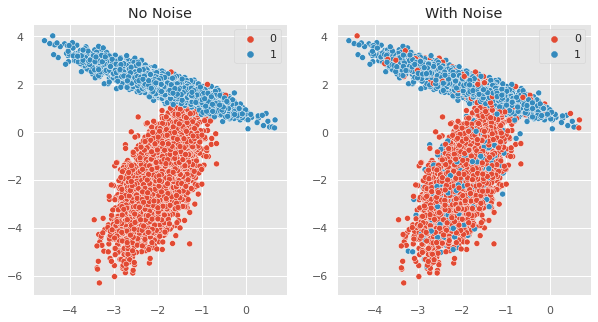

In [100]:
from sklearn.datasets import make_classification
# Generate Clean data
X,y = make_classification(n_samples=10000, n_features=2, n_informative=2,n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=1,class_sep=2,flip_y=0,weights=[0.5,0.5], random_state=17)
f, (ax1,ax2) = plt.subplots(nrows=1, ncols=2,figsize=(10,5))
sns.scatterplot(X[:,0],X[:,1],hue=y,ax=ax1)
ax1.set_title("No Noise")
X_train , y_train = X, y
# Generate noisy Data
X,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=1,class_sep=2,flip_y=0.2,weights=[0.5,0.5], random_state=17)
sns.scatterplot(X[:,0],X[:,1],hue=y,ax=ax2)
ax2.set_title("With Noise")
plt.show()

X_test , y_test = X, y

Running Classifications 



		 
 [[4395  581]
 [ 525 4499]]


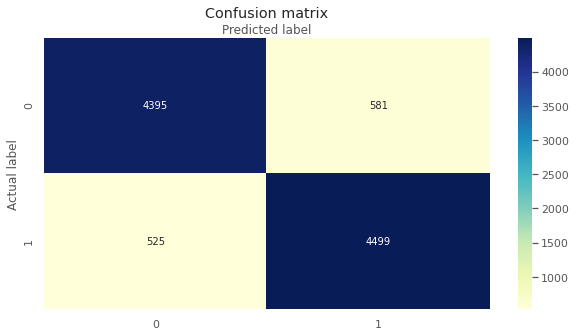

              precision    recall  f1-score   support

           0       0.89      0.88      0.89      4976
           1       0.89      0.90      0.89      5024

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [101]:
Run_Classification(x_set1 , y_set1 , x_set2 , y_set2 , feature_cols= [0,1] , modeltype='nb' )

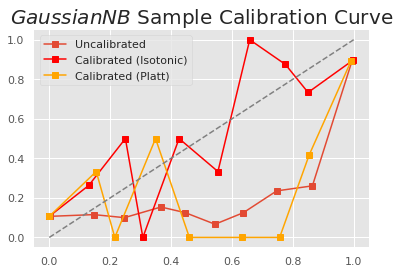

In [102]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.calibration import calibration_curve

# Uncalibrated
clf = GaussianNB()
clf.fit(X_train, y_train)
y_test_predict_proba = clf.predict_proba(X_test)[:, 1]
fraction_of_positives, mean_predicted_value = calibration_curve(y_test, y_test_predict_proba, n_bins=10)

plt.plot(mean_predicted_value, fraction_of_positives, 's-', label='Uncalibrated')

# Calibrated
clf_sigmoid = CalibratedClassifierCV(clf, cv=3, method='isotonic')
clf_sigmoid.fit(X_train, y_train)
y_test_predict_proba = clf_sigmoid.predict_proba(X_test)[:, 1]
fraction_of_positives, mean_predicted_value = calibration_curve(y_test, y_test_predict_proba, n_bins=10)

plt.plot(mean_predicted_value, fraction_of_positives, 's-', color='red', label='Calibrated (Isotonic)')

# Calibrated, Platt
clf_sigmoid = CalibratedClassifierCV(clf, cv=3, method='sigmoid')
clf_sigmoid.fit(X_train, y_train)
y_test_predict_proba = clf_sigmoid.predict_proba(X_test)[:, 1]
fraction_of_positives, mean_predicted_value = calibration_curve(y_test, y_test_predict_proba, n_bins=10)
plt.plot(mean_predicted_value, fraction_of_positives, 's-', color='orange', label='Calibrated (Platt)')


plt.plot([0, 1], [0, 1], '--', color='gray')

sns.despine(left=True, bottom=True)
plt.gca().xaxis.set_ticks_position('none')
plt.gca().yaxis.set_ticks_position('none')
plt.gca().legend()
plt.title("$GaussianNB$ Sample Calibration Curve", fontsize=20); pass

#EX-2: SPAM detection

<ul>
  <li>Here is <a href="https://elephantscale-public.s3.amazonaws.com/data/spam/SMSSpamCollection.txt">SMS Spam dataset</a></li>
  <li>Start with this <a href="https://github.com/elephantscale/guided-machine-learning-labs/blob/master/naive-bayes/naive-bayes-1-spam.ipynb">notebook</a></li>
  <li>Use NB to predict spam / ham</li>
  <li>Create a confusion matrix</li>
  <li>What is the accuracy of the model</li>
</ul>

#### Naive Bayes Spam Filtering

    ### Overview

    We all hate spam, so developing a classifier to classify email as spam or not spam is useful.  

    ### Builds on
    None

    ### Run time
    approx. 20-30 minutes

    ### Notes

    We can do Naive Bayes classification.

#### Step 1: Load Data
We will load the dataframe into pandas.  Since the outcome label is "ham" or "spam", that will be our label.

In [103]:
import os
import urllib.request

data_location = 'SMSSpamCollection.txt'
data_url = 'https://elephantscale-public.s3.amazonaws.com/data/spam/SMSSpamCollection.txt'

if not os.path.exists(data_location):
    urllib.request.urlretrieve(data_url, data_location)
    print ("Downloading  ", data_url)
print ('data_location: ', data_location)

data_location:  SMSSpamCollection.txt


In [104]:
import pandas as pd

dataset = pd.read_csv(data_location, sep='\t')
dataset.describe()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   isspam  5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


### Step 2 - Explore Data

In [105]:
## TODO :  Count spam/ham
## Hint : group by 'isspam'
## Question : Is there a data skew?
dataset.groupby("isspam").size()

isspam
ham     4825
spam     747
dtype: int64

### Step 3: Vectorize Using TF/IDF

Let's use tf/idf for vecorization at first.  TF/IDF will take and count the instances of each term, and then divide by the total frequecy of that term in the entire dataset.  

This leads to very highly dimensional data, because every word in the document will lead to a dimension in the data.

In [106]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer


pipeline = Pipeline([('vec', CountVectorizer()),
                     ('tfidf', TfidfTransformer())])

x = pipeline.fit_transform(dataset['text'])
x

<5572x8713 sparse matrix of type '<class 'numpy.float64'>'
	with 74169 stored elements in Compressed Sparse Row format>

In [107]:
## we can leave y as 'spam' / 'ham'
y = dataset['isspam']
y
## encode y 
# Encoding above ordinal data using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
ordinalencoder = OrdinalEncoder()
dataset['isspam_index'] = ordinalencoder.fit_transform(dataset[['isspam']])
dataset

## TODO : encode y
## Hint : use the 'isspam' column
y = pd.factorize(dataset['isspam_index'])[0]
y

array([0, 0, 1, ..., 0, 0, 0])

In [108]:
 #defin features: text and predict output: isspam
 feature_labels = ['text']
 target_variable = ['isspam_index']

In [120]:
#Transform the data set into a X, y data frame 
df_x = pd.DataFrame(dataset, columns = feature_labels ) 
df_y = pd.DataFrame(dataset.isspam_index)

print( "Size of \nX: {}  \nY :{}".format(  df_x.shape ,  df_y.shape  )  )
print( "variables :{}  \nTarget :{}".format(  feature_labels ,  target_variable )  )

Size of 
X: (5572, 1)  
Y :(5572, 1)
variables :['text']  
Target :['isspam_index']


### Step 4: Split train/test

In [129]:
## TODO: Use training / test split of 80%/20%

from sklearn.model_selection import train_test_split
## split the data 
x_train , x_test , y_train , y_test = train_test_split(x , y, test_size = 0.20)
print( "Size of \nx_train :{}  y_train :{} \nx_test :{}  y_test :{}".format(  x_train.shape ,  y_train.shape , x_test.shape, y_test.shape )  )


Size of 
x_train :(4457, 8713)  y_train :(4457,) 
x_test :(1115, 8713)  y_test :(1115,)


### Step 5 : Run Naive Bayes

In [130]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB ()
modeltype = "Multinominal Naive Bayes"
##TODO : fit on (x_train, y_train)
model = nb.fit(x_train, y_train)

### TODO : Train and Evaluate the Model

- Compute training / testing accuracy
- compute confusion matrix

In [131]:
## Train the model 
tr_score = model.score(x_train, y_train)
tst_score =   model.score(x_test, y_test)
print ( "{0}  Model Accuracy for training  :{1}  ,  Testing :{2}".format( modeltype, tr_score ,   tst_score   ))


Multinominal Naive Bayes  Model Accuracy for training  :0.9699349338119811  ,  Testing :0.9650224215246637


In [132]:
## Evaluate the model
y_pred = model.predict(x_test)

=============show confusion matrix values============= 60

		 
 [[975   0]
 [ 39 101]]
=============Visualize confusion Matrix============= 60


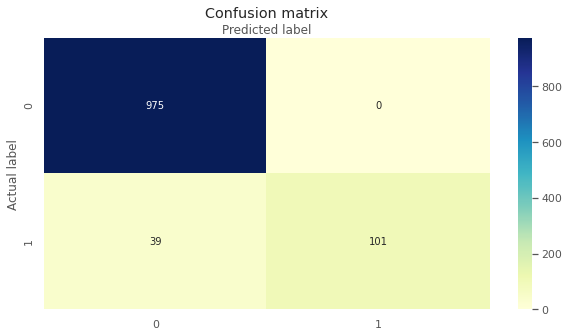

=============Classification report=============
 70
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       975
           1       1.00      0.72      0.84       140

    accuracy                           0.97      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.97      0.97      0.96      1115



In [133]:
from sklearn.metrics import classification_report, confusion_matrix

print('=============show confusion matrix values=============', 60)
# Show the Confusion Matrix
cnf_matrix  = confusion_matrix(y_test, y_pred)
print ('\n\t\t \n',cnf_matrix )


print('=============Visualize confusion Matrix=============', 60)
#Visualize confusion Matrix  
fig, ax1 = plt.subplots(figsize=(10,5))
tick_marks = np.arange(len(feature_labels))
plt.xticks(tick_marks, feature_labels)
plt.yticks(tick_marks, feature_labels)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix ), cmap="YlGnBu" , annot=True,  fmt='g', ax=ax1)
ax1.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

print('=============Classification report=============\n', 70)
print(classification_report(y_test, y_pred))

### Run your own data!

Now it's your turn!   Make a new dataframe with some sample test data of your own creation.  Make some "spammy" SMSes and some ordinary ones.  See how our spam filter does.

In [134]:
mydata = pd.DataFrame ( { 'text' : [
                                     'can we meet for lunch?',
                                     'win win win instant tickets!',
                                     'ultra cheap medications!!!',
                                     'There is hurricane'
]})

mydata

,text
0,can we meet for lunch?
1,win win win instant tickets!
2,ultra cheap medications!!!
3,There is hurricane


In [135]:
my_x = pipeline.transform(mydata['text'])
my_x

<4x8713 sparse matrix of type '<class 'numpy.float64'>'
	with 11 stored elements in Compressed Sparse Row format>

In [136]:
my_pred = model.predict(my_x)
my_pred

array([0, 1, 0, 0])

In [137]:
mydata['prediction'] = my_pred
mydata

,text,prediction
0,can we meet for lunch?,0
1,win win win instant tickets!,1
2,ultra cheap medications!!!,0
3,There is hurricane,0


#EX-3 - BONUS Lab

<ul>
  <li>Choose another text or categorical data from <a href="
  https://elephantscale.github.io/guided-machine-learning/data.html">data section</a></li>
  <li>And solve it with naive bayes</li>
</ul>